In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('./compiled.csv')
# df = df.dropna()
#df = df.drop(columns=['Unnamed: 0']).dropna()
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%', 'FT%', 'TmNetRtg'],
      dtype='object')

In [68]:
df[df['Tm']=='BRK']

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg
1025,2013,Keith Bogans,SG,32.0,BRK,74.0,1408.0,6.7,0.533,0.863,...,0.7,0.7,1.4,0.047,-0.4,-0.9,0.343,0.615,0.647,2.0
1026,2013,Reggie Evans,PF,32.0,BRK,80.0,1967.0,12.8,0.506,0.000,...,0.8,3.5,4.3,0.105,-3.2,1.3,NaN,0.479,0.509,2.0
1027,2013,Joe Johnson,SG,31.0,BRK,72.0,2642.0,14.1,0.521,0.375,...,3.9,1.2,5.1,0.092,1.9,-1.7,0.375,0.452,0.820,2.0
1028,2013,Gerald Wallace,SF,30.0,BRK,69.0,2076.0,11.6,0.490,0.356,...,0.6,2.5,3.1,0.072,-0.7,2.6,0.282,0.461,0.637,2.0
1077,2014,Alan Anderson,SF,31.0,BRK,78.0,1773.0,9.5,0.525,0.511,...,0.8,0.9,1.7,0.047,-0.8,-1.4,0.339,0.464,0.780,-1.3
1078,2014,Kevin Garnett,C,37.0,BRK,54.0,1109.0,13.3,0.467,0.008,...,-0.7,1.9,1.2,0.054,-4.7,2.8,0.000,0.445,0.809,-1.3
1079,2014,Joe Johnson,SG,32.0,BRK,79.0,2575.0,15.5,0.564,0.397,...,3.9,1.0,4.9,0.091,2.0,-2.2,0.401,0.489,0.815,-1.3
1080,2014,Paul Pierce,SF,36.0,BRK,75.0,2098.0,16.8,0.595,0.421,...,2.9,2.3,5.2,0.119,1.3,0.2,0.373,0.507,0.826,-1.3
1127,2015,Alan Anderson,SG,32.0,BRK,74.0,1744.0,10.6,0.563,0.477,...,1.7,1.1,2.7,0.075,0.0,-0.5,0.348,0.530,0.812,-3.0
1128,2015,Jarrett Jack,PG,31.0,BRK,80.0,2241.0,14.6,0.522,0.179,...,1.1,1.4,2.6,0.055,-0.5,-1.0,0.267,0.477,0.881,-3.0


In [24]:
#!pip install webdriver-manager
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get('https://www.basketball-reference.com/friv/continuity.html')

elements = driver.find_elements_by_xpath('/html/body/div[2]/div[3]/div/div[2]/table/tbody/tr')

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [/Users/gauravmohan/.wdm/drivers/chromedriver/mac64/94.0.4606.61/chromedriver] found in cache


In [42]:
tms = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK',
       'OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
season = ['1997', '1998', '1999','2000', '2001', '2002',
         '2003','2004','2005','2006', '2007', '2008', '2009', '2010',
         '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
         '2019', '2020','2021','2022']
index = len(season)-1

with open('continuity.txt','w') as f:
    f.write('Year,Tm,Continuity' + '\n')

for i in elements:
    vals = i.text.split(' ')
    if vals[0] == '1995-96':
        break
    elif vals[0] == 'Season':
        continue
    else:
        vals = vals[1:]
    totals = list(zip(tms,vals))
    with open('continuity.txt','a') as f:
        for i in totals:
            f.write(season[index] + ',' + i[0] + ',' + i[1][:-1] + '\n')
    index -= 1

    
    


26


In [46]:
read_file = pd.read_csv('continuity.txt')
read_file.to_csv('continuity.csv')

In [69]:
df_temp = pd.read_csv('continuity.csv')
df_temp['Year'] = df_temp['Year'].astype(int)
df_temp['Continuity'] = df_temp['Continuity'].astype(int)



In [71]:
df = pd.merge(df, df_temp,  how='inner', on=['Year','Tm'])

### Calculate Change in TmNetRtg and WS

In [3]:
next_rtg = []
for index, row in df.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        rtg = df.loc[(df['Player'] == current_player) & (df['Year'] == next_year)].iloc[0]['TmNetRtg']
        next_rtg.append(rtg)
    except:
        next_rtg.append(math.nan)

In [4]:
df['Next Rtg'] = next_rtg

In [5]:
next_ws = []
for index, row in df.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        ws = df.loc[(df['Player'] == current_player) & (df['Year'] == next_year)].iloc[0]['WS']
        next_ws.append(ws)
    except:
        next_ws.append(math.nan)

In [6]:
df['Next WS'] = next_ws
df = df.dropna()
df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,3.1,0.066,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,3.4,0.066,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7
7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,0.296,...,9.4,0.224,4.4,2.8,0.283,0.569,0.694,4.7,-0.9,8.6
8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,0.373,...,8.1,0.172,3.9,1.7,0.355,0.493,0.750,4.7,-0.9,6.8
9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,0.489,...,8.9,0.159,2.4,0.1,0.420,0.572,0.896,4.7,-0.9,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,0.018,...,5.4,0.197,-1.0,1.2,0.600,0.732,0.514,5.6,5.5,4.0
1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,0.326,...,9.8,0.204,6.6,1.8,0.348,0.564,0.693,5.6,2.9,5.6
1412,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,0.681,...,4.2,0.112,-0.5,1.8,0.405,0.477,0.791,1.9,0.1,3.1
1416,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,0.283,...,3.5,0.136,0.3,-0.2,0.435,0.500,0.816,2.2,4.8,3.2


### Create Veteran Value Metric

In [7]:
change_ws = 100*((df['Next WS'] - df['WS'])/abs(df['WS']))
change_ws.dropna(inplace=True)
#assert(change_ws[0] == (df.iloc[0]['Next WS'] - df.iloc[0]['WS']))
#assert(len(change_ws) == len(change_usg))

In [8]:
change_ws.describe()

count     821.000000
mean        8.883384
std       163.565608
min      -300.000000
25%       -40.277778
50%       -15.116279
75%        22.580645
max      3100.000000
dtype: float64

In [9]:
df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,3.1,0.066,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,3.4,0.066,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7
7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,0.296,...,9.4,0.224,4.4,2.8,0.283,0.569,0.694,4.7,-0.9,8.6
8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,0.373,...,8.1,0.172,3.9,1.7,0.355,0.493,0.750,4.7,-0.9,6.8
9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,0.489,...,8.9,0.159,2.4,0.1,0.420,0.572,0.896,4.7,-0.9,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,0.018,...,5.4,0.197,-1.0,1.2,0.600,0.732,0.514,5.6,5.5,4.0
1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,0.326,...,9.8,0.204,6.6,1.8,0.348,0.564,0.693,5.6,2.9,5.6
1412,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,0.681,...,4.2,0.112,-0.5,1.8,0.405,0.477,0.791,1.9,0.1,3.1
1416,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,0.283,...,3.5,0.136,0.3,-0.2,0.435,0.500,0.816,2.2,4.8,3.2


In [10]:
import math
change_rtg = 100*((df['Next Rtg'] - df['TmNetRtg']).divide(df['TmNetRtg'].abs()))
change_rtg.replace([np.inf, -np.inf], np.nan, inplace=True)
null = []
for k,v in change_rtg.iteritems():
    if math.isnan(v):
        null.append(k)
print(null)
change_rtg.dropna(inplace=True)

[424, 835, 1161, 1162, 1163]


In [11]:
df[df['Player']=='LeBron James']

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1136,2015,LeBron James,SF,30.0,CLE,69.0,2493.0,25.9,0.577,0.265,...,10.4,0.199,6.2,1.2,0.354,0.536,0.710,4.8,6.3,13.6
1195,2016,LeBron James,SF,31.0,CLE,76.0,2709.0,27.5,0.588,0.199,...,13.6,0.242,6.9,2.3,0.309,0.573,0.731,6.3,3.1,12.9
1241,2017,LeBron James,SF,32.0,CLE,74.0,2794.0,27.0,0.619,0.254,...,12.9,0.221,6.8,1.6,0.363,0.611,0.674,3.1,1.0,14.0
1307,2018,LeBron James,PF,33.0,CLE,82.0,3026.0,28.6,0.621,0.257,...,14.0,0.221,7.6,2.0,0.367,0.603,0.731,1.0,-1.6,7.2
1366,2019,LeBron James,SF,34.0,LAL,55.0,1937.0,25.6,0.588,0.299,...,7.2,0.179,6.4,1.7,0.339,0.582,0.665,-1.6,5.6,9.8
1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,0.326,...,9.8,0.204,6.6,1.8,0.348,0.564,0.693,5.6,2.9,5.6


In [12]:
df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,3.1,0.066,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,3.4,0.066,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7
7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,0.296,...,9.4,0.224,4.4,2.8,0.283,0.569,0.694,4.7,-0.9,8.6
8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,0.373,...,8.1,0.172,3.9,1.7,0.355,0.493,0.750,4.7,-0.9,6.8
9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,0.489,...,8.9,0.159,2.4,0.1,0.420,0.572,0.896,4.7,-0.9,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,0.018,...,5.4,0.197,-1.0,1.2,0.600,0.732,0.514,5.6,5.5,4.0
1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,0.326,...,9.8,0.204,6.6,1.8,0.348,0.564,0.693,5.6,2.9,5.6
1412,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,0.681,...,4.2,0.112,-0.5,1.8,0.405,0.477,0.791,1.9,0.1,3.1
1416,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,0.283,...,3.5,0.136,0.3,-0.2,0.435,0.500,0.816,2.2,4.8,3.2


In [13]:
print(len(df),len(change_ws),len(change_rtg))

821 821 816


In [14]:
index = [424, 835, 1161, 1162, 1163]

In [15]:
df = df[~df.index.isin(index)]

In [16]:
change_ws = change_ws[~change_ws.index.isin(index)]

In [17]:
print(len(df),len(change_ws),len(change_rtg))

816 816 816


In [18]:
z = zip(change_ws, change_rtg)
targets = []
target_class = []
class_var = []
#tgt represents decline
for t in z:
    d_ws = t[0]
    d_rtg = t[1]
    
    RTG_UP = d_rtg > 0
    RTG_DOWN = d_rtg < 0
    WS_UP = d_ws >= 0
    
    
    if RTG_UP:
        vv = d_rtg * d_ws
        class_var.append(0)
    else:
        if WS_UP:
            vv = -1*d_ws*d_rtg 
            class_var.append(1)

        else:
#             vv = np.nan
            vv = d_rtg / d_ws
            class_var.append(2)

    
    targets.append(vv)
    target_class.append(0 if vv >= 0 else 1)
    
df['Veteran Value'] = targets
df['VV Class'] = target_class
#df['Class_Var'] = class_var

<ipython-input-18-aff40e5c4f82>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Veteran Value'] = targets
<ipython-input-18-aff40e5c4f82>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VV Class'] = target_class


In [19]:
np.mean(targets)

4709.2497301035155

In [20]:
np.percentile(targets, 10)

-2439.2091284674398

In [21]:
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0
7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,0.296,...,4.4,2.8,0.283,0.569,0.694,4.7,-0.9,8.6,14.000000,0
8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,0.373,...,3.9,1.7,0.355,0.493,0.750,4.7,-0.9,6.8,7.423895,0
9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,0.489,...,2.4,0.1,0.420,0.572,0.896,4.7,-0.9,3.8,2.079266,0


### Relationship between Decline and Features¶

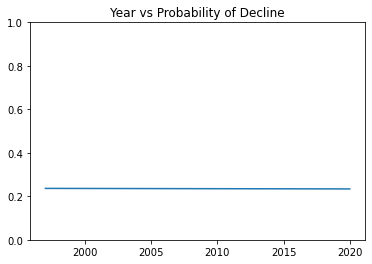

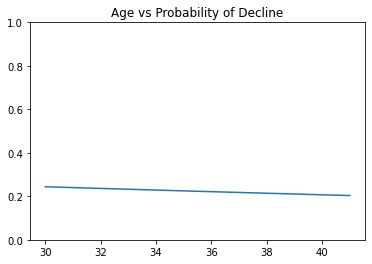

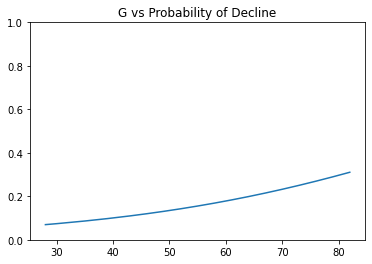

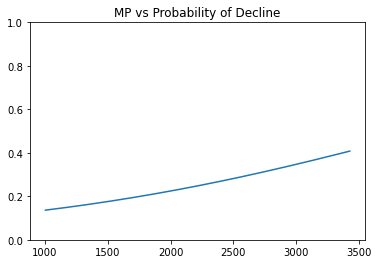

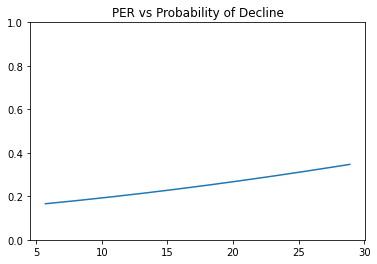

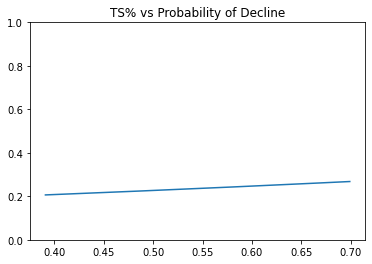

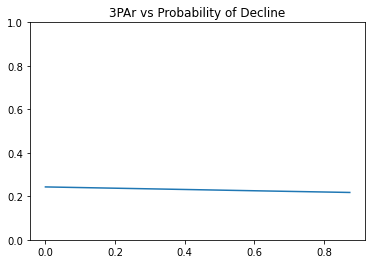

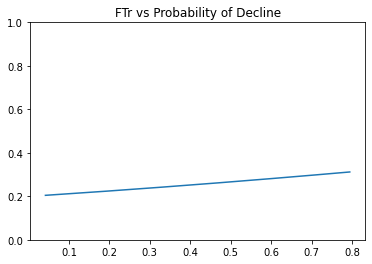

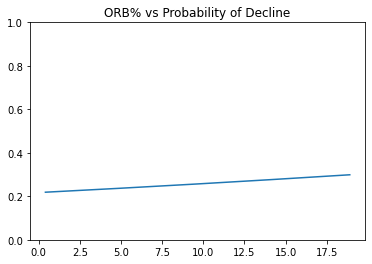

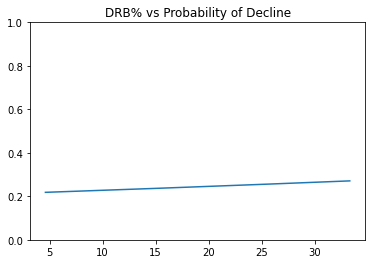

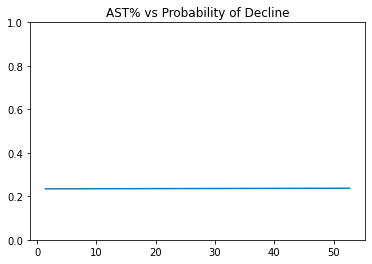

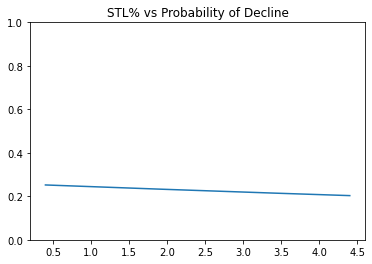

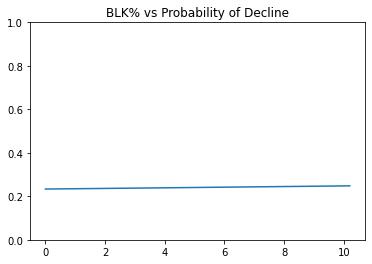

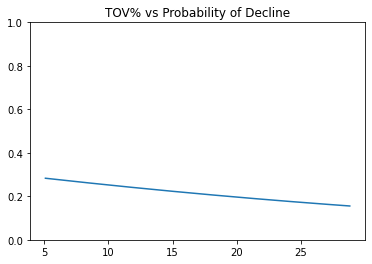

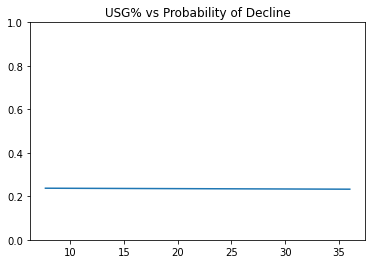

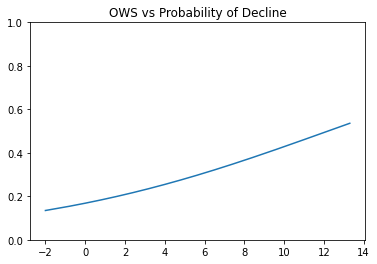

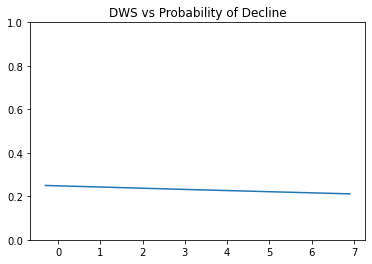

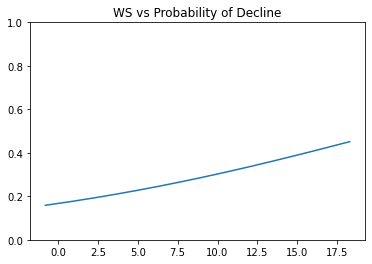

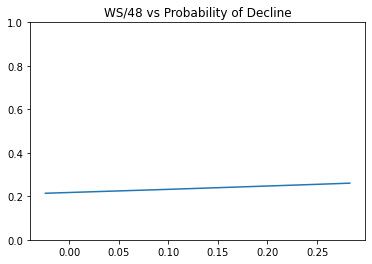

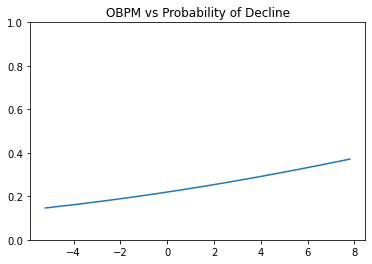

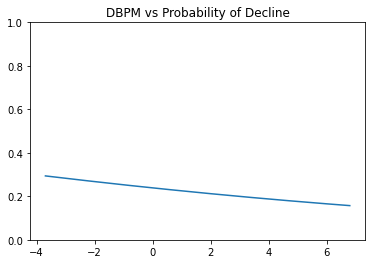

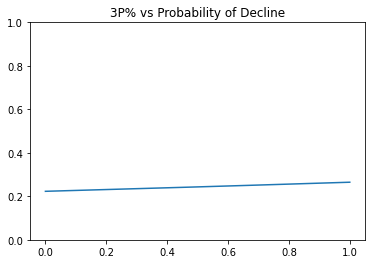

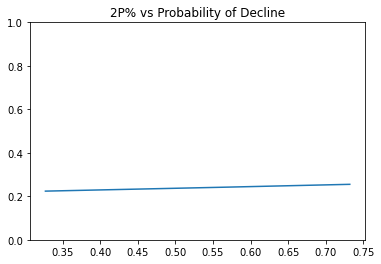

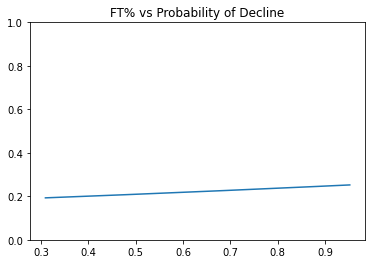

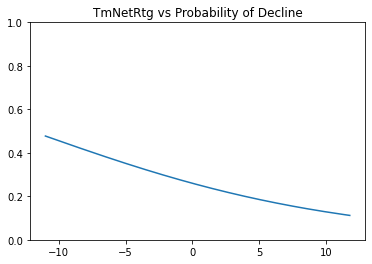

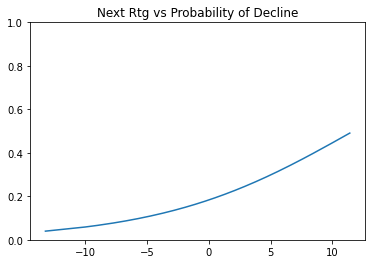

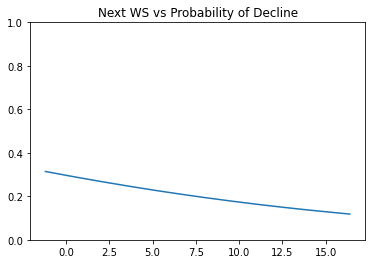

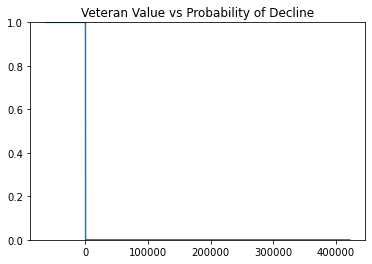

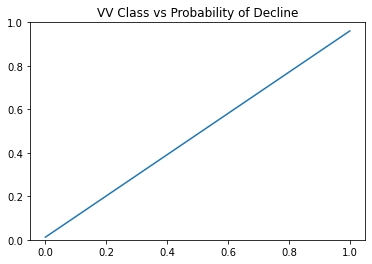

In [22]:
label = df['VV Class']
for c in df.columns:
    try:
        feature = list(df[c])

        z = list(zip(feature, label))
        z = sorted(z, key=lambda t: t[0])

        X = [t[0] for t in z]
        X = np.array(X).reshape(-1, 1)
        y = [t[1] for t in z]

        clf = LogisticRegression(random_state=0).fit(X, y)
        yg = clf.predict_proba(X)[:, 1]

        plt.title('%s vs Probability of Decline'%(c))
        plt.plot(X, yg)
        ax = plt.gca()
        ax.set_ylim([0, 1])
        plt.show()
    except:
        continue

### Visualizing Distribution of Veteran Value

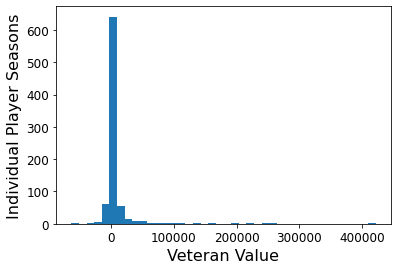

In [23]:
ax = plt.hist(df['Veteran Value'], bins=40)
ax = plt.xlabel('Veteran Value', fontsize=16)
ax = plt.ylabel('Individual Player Seasons', fontsize=16)
ax = plt.xticks(fontsize=12)
ax = plt.yticks(fontsize=12)

In [24]:
def outlier_aware_hist(data, lower=None, upper=None):
    if not lower or lower < data.min():
        lower = data.min()
        lower_outliers = False
    else:
        lower_outliers = True

    if not upper or upper > data.max():
        upper = data.max()
        upper_outliers = False
    else:
        upper_outliers = True

    n, bins, patches = plt.hist(data, range=(lower, upper), bins='auto')

    if lower_outliers:
        n_lower_outliers = (data < lower).sum()
        patches[0].set_height(patches[0].get_height() + n_lower_outliers)
        patches[0].set_facecolor('c')
        patches[0].set_label('Lower outliers: ({:.2f}, {:.2f})'.format(data.min(), lower))

    if upper_outliers:
        n_upper_outliers = (data > upper).sum()
        patches[-1].set_height(patches[-1].get_height() + n_upper_outliers)
        patches[-1].set_facecolor('m')
        patches[-1].set_label('Upper outliers: ({:.2f}, {:.2f})'.format(upper, data.max()))

    if lower_outliers or upper_outliers:
        plt.legend()
    plt.title('Range of Veteran Value')
    plt.xlabel('Veteran Value',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)

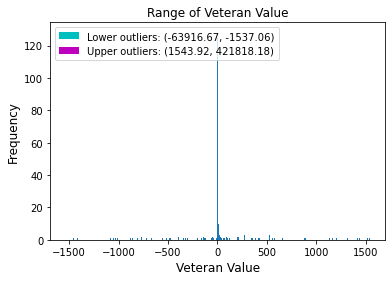

In [25]:
def mad(data):
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    return mad

def calculate_bounds(data, z_thresh=3.5):
    MAD = mad(data)
    median = np.median(data)
    const = z_thresh * MAD / 0.6745
    return (median - const, median + const)

outlier_aware_hist(df['Veteran Value'], *calculate_bounds(df['Veteran Value']))

The distribution of player decline appears normal, with most of the change centered around 0, which makes sense based on how we calculate decline. However the outliers extend pretty far out to ranges from -6 to -30 and improvement having a range from 6 to 22. While the objective is to find the largest veteran declines, we also want to make sure our formula has a proper distribution, there appears to be too many players in the lower and upper outlier range as indicated by the first and last bin. 

### Evaluate How Age and Playing Time Affects Veteran Value

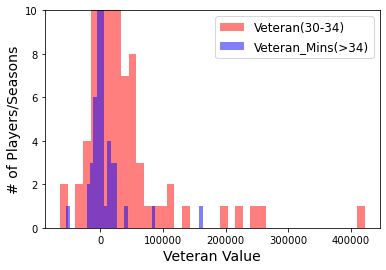

In [26]:
# Separate players into Veteran(30-34) and Veteran_Mins(>=35). 
#Veteran_Mins are old players who typically sign for the minimum
veteran = df.loc[(df['Age']>=30) & (df['Age']<35), 'Veteran Value']
veteran_mins = df.loc[df['Age']>=35, 'Veteran Value']
plot_data = [veteran, veteran_mins]
labels = ['Veteran(30-34)','Veteran_Mins(>34)']
colors = ['red','blue']
# Histogram
#ax = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_ylim([0,10])
for group, label, color in zip(plot_data, labels, colors):
    _ = plt.hist(group, bins=40, alpha=0.5, label=label, color=color)
plt.xlabel('Veteran Value', fontsize=14)
plt.ylabel('# of Players/Seasons', fontsize=14)
plt.legend(fontsize=12)

In [27]:
df.loc[(df['Veteran Value'] >2000)]

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0
11,1997,Kevin Willis,PF,34.0,HOU,75.0,1964.0,14.3,0.515,0.019,...,-3.6,-0.2,0.143,0.487,0.693,4.7,-0.9,6.0,6898.096305,0
29,1997,Blue Edwards,SF,31.0,VAN,61.0,1439.0,10.0,0.472,0.194,...,-3.2,-1.8,0.281,0.425,0.817,-11.0,-7.8,2.1,64000.000000,0
30,1997,Dale Ellis,SF,36.0,DEN,82.0,2940.0,12.9,0.537,0.459,...,1.6,-2.6,0.364,0.457,0.817,-6.6,7.9,6.0,20552.297165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,2020,Kent Bazemore,SF,30.0,POR,43.0,1111.0,7.5,0.475,0.525,...,-3.6,0.4,0.327,0.368,0.806,-1.1,1.1,1.8,200000.000000,0
1393,2020,Mike Conley,PG,32.0,UTA,47.0,1363.0,14.1,0.537,0.451,...,0.7,-0.4,0.375,0.437,0.827,2.5,9.0,6.1,37440.000000,0
1394,2020,Joe Ingles,SF,32.0,UTA,72.0,2137.0,12.6,0.595,0.638,...,0.0,0.7,0.399,0.525,0.787,2.5,9.0,7.0,11916.666667,0
1403,2020,Marcus Morris,SF,30.0,NYK,43.0,1387.0,16.5,0.582,0.415,...,1.8,-1.1,0.439,0.444,0.823,-6.5,6.1,3.6,4679.045093,0


In [28]:
def ztest(d1, d2, label):
    from statsmodels.stats.weightstats import CompareMeans
    test_data = CompareMeans.from_data(d1, d2)
    z, p = CompareMeans.ztest_ind(test_data)
    print('For {}, z = {}, p = {}'.format(label,z,p))

In [29]:
ztest(veteran, veteran_mins, 'Veterans vs Old Veterans')
print('The average improvement for veterans were', veteran.mean())
print('The average improvement for old veterans were', veteran_mins.mean())

For Veterans vs Old Veterans, z = 1.0898649775397, p = 0.2757726260416986
The average improvement for veterans were 5144.556707912925
The average improvement for old veterans were 2369.4747243779416


There appears to be a much larger distribution of decline amongst veteran players compared to older veterans. This is expected, as most player are already past their prime by the age of 35. Furthermore, the ztest shows the affect of decline between veterans and old veterans is statistically insignificant.

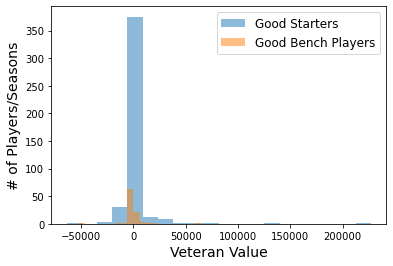

In [30]:
# Separate data into good starters and good bench
good_starters = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']>25), 'Veteran Value']
good_bench = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']<=25), 'Veteran Value']
ax = plt.hist(good_starters, bins=20, alpha=0.5, label='Good Starters')
ax = plt.hist(good_bench, bins=20, alpha=0.5, label='Good Bench Players')
plt.xlabel('Veteran Value', fontsize=14)
plt.ylabel('# of Players/Seasons', fontsize=14)
plt.legend(fontsize=12)

In [31]:

ztest(good_starters, good_bench, 'Good Starters vs Good Bench')
print('The average improvement for good starters were', good_starters.mean())
print('The average improvement for good bench players were', good_bench.mean())

For Good Starters vs Good Bench, z = 0.4715904011947324, p = 0.6372191794418613
The average improvement for good starters were 1331.0582692850446
The average improvement for good bench players were 526.9674170553268


The results for this are more interesting, there appears to be a significant impact on decline when a player is a starter vs a bench player. We can infer that there might need to be an additional target class identifier between what we define as bench players compared to starter players.

In [32]:
# starter = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']>25),'Player']
# all_star = df.loc[(df['WS/48']>=0.15) &a (df['MP']/df['G']>30) & (df['USG%'] > 20),'Player']
# super_star = df.loc[(df['WS/48']>=0.15) & (df['MP']/df['G']>30) & (df['USG%'] > 30),'Player']
# player_level = []
# for p in df['Player']:
#     if p in list(super_star):
#         player_level.append(3)
#     elif p in list(all_star) and p not in list(super_star):
#         player_level.append(2)
#     elif p in list(starter) and p not in list(super_star) and p not in list(all_star):
#         player_level.append(1)
#     else:
#         player_level.append(0)
# df['Player Level'] = player_level

In [33]:
temp = []
for index, row in df.iterrows():
    if row['WS/48'] >= 0.15 and row['MP'] / row['G'] > 30 and row['USG%'] > 30:
        temp.append(3)
    elif row['WS/48'] >= 0.15 and row['MP'] / row['G'] > 30 and row['USG%'] > 20:
        temp.append(2)
    elif row['WS/48'] >= 0.1 and row['MP'] / row['G'] > 25:
        temp.append(1)
    else:
        temp.append(0)
df['Player Level'] = temp

<ipython-input-33-40b4727b78cb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player Level'] = temp


In [34]:
df.to_csv('model_data.csv')

In [35]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%', 'FT%', 'TmNetRtg',
       'Next Rtg', 'Next WS', 'Veteran Value', 'VV Class', 'Player Level'],
      dtype='object')